## Comparison of climate data and continuous temperature measurements of Great Boiling Springs, NV.

As part of a proposal effort in 2013, I compared weather station climate data to round-the-clock temperature measurements of Great Boiling Springs in Gerlach, NV, which had been funded in a separate proposal. The goal was to identify patterns that might indicate  influence of air temperature and precipitation on this terrestrial hydrothermal system. Results shown here are nowhere near exhaustive (having been derived in Excel spreadsheets originally), but gave me an opportunity to wrangle with datasets early in my graduate student career.

Temperature data from Great Boiling Springs in Gerlach, NV were recorded by Behar's Environmental Networking, Telemetry and Observation (BENTO) box. Data used here were compiled from [BENTO box 1](http://extremerobotics.lab.asu.edu/Bentobox/bentoData11.php) and [BENTO box 2](http://extremerobotics.lab.asu.edu/Bentobox/bentoData12.php) datasets available free online.


Climate data were collected at the MFOXN2 weather station located in Gerlach, NV, except for a brief period between 9/7/12 and
10/11/12 when the station went offline, at which point data from station MJSPN2 at the Derby Field airport in Lovelock, NV was used to fill the gap.

Researchers working at Great Boiling Springs, NV
![pic](http://1ofdmq2n8tc36m6i46scovo2e-wpengine.netdna-ssl.com/wp-content/uploads/2016/01/1K-GBS_Brian-Hedlund_Kryptonia.jpg "Great Boiling Springs, NV")
*photo credit: Brian Hedlund*

In [1]:
# read hot spring sensor and weather station data
bento <- read.csv("BentoData.csv")
weather <- read.csv("WeatherData.csv")

In [2]:
# get an idea as to the size of these datasets
"nrows and ncol of BENTO dataset:"
dim(bento)
"nrows and ncol of weather dataset:"
dim(weather)

[1] "nrows and ncol of BENTO dataset:"

[1] 7383   17

[1] "nrows and ncol of weather dataset:"

[1] 314  16

In [3]:
# check the formatting of these datasets
"BENTO temperature sensor readings from Great Boiling Springs, NV:"
head(bento)
"Weather station data:"
head(weather)

[1] "BENTO temperature sensor readings from Great Boiling Springs, NV:"

RecordTime,Battery.V.,Rate,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13
41016.34,10.3,Normal,35.01,40.66,42.26,54.05,41.66,43.85,42.65,12.02,44.75,55.05,51.64,55.65,55.85,53.04
41016.34,10.3,Normal,34.52,40.86,41.46,54.25,41.46,43.85,42.65,12.12,44.75,54.45,51.74,55.65,56.35,52.94
41016.34,10.4,Normal,34.32,40.86,40.57,54.35,41.26,43.85,42.65,12.51,44.75,54.95,51.64,55.55,55.75,52.74
41016.35,10.4,Normal,33.62,40.76,39.17,53.64,41.36,43.95,42.75,12.22,44.85,54.85,51.74,55.55,55.75,52.74
41016.38,10.5,Normal,33.82,43.65,37.49,54.35,40.27,44.15,43.25,15.44,45.74,53.84,53.04,55.75,57.66,52.94
41016.42,10.5,Normal,37.49,42.95,42.26,54.75,44.25,44.35,43.45,20.72,47.94,56.25,52.74,56.15,57.86,54.05


[1] "Weather station data:"

Date,TemperatureHighC,TemperatureAvgC,TemperatureLowC,DewpointHighF,DewpointAvgF,DewpointLowF,HumidityHigh,HumidityAvg,HumidityLow,PressureMaxIn,PressureMinIn,WindSpeedMaxMPH,WindSpeedAvgMPH,GustSpeedMaxMPH,PrecipitationSumIn
41016,11.7,5.6,0.0,30,24,14,93,56,28,0,40,11,7,25,0.00
41017,8.9,4.4,1.1,37,31,20,100,73,44,0,40,15,8,23,0.00
41018,14.4,7.8,2.2,42,40,36,100,82,52,0,40,13,8,26,0.01
41019,21.1,12.8,3.9,43,34,19,94,53,16,0,40,7,4,19,0.00
41020,22.2,15.6,8.3,33,25,14,51,30,11,0,40,13,6,22,0.00
41021,23.9,16.7,7.8,33,26,16,53,29,11,0,40,13,6,25,0.00


The column "RecordTime" in the BENTO dataset needs to be converted to date/time format.

In [4]:
# create column converting RecordTime into proper date/time format
bento$DateTime <- as.POSIXct(
  bento$RecordTime * (60*60*24), # (seconds)
  origin="1899-12-30", # Excel's origin time
  tz="GMT") # origin time zone

# create a column for date only
bento$Date <- as.Date(floor(bento$RecordTime), origin="1899-12-30")

# convert to date format
weather$Date <- as.Date(weather$Date, origin="1899-12-30")

# check that formatting is correct in both datasets
"BENTO temperature sensor readings from Great Boiling Springs, NV:"
head(bento)
"Weather station data:"
head(weather)

[1] "BENTO temperature sensor readings from Great Boiling Springs, NV:"

RecordTime,Battery.V.,Rate,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,DateTime,Date
41016.34,10.3,Normal,35.01,40.66,42.26,54.05,41.66,43.85,42.65,12.02,44.75,55.05,51.64,55.65,55.85,53.04,2012-04-17 08:14:00,2012-04-17
41016.34,10.3,Normal,34.52,40.86,41.46,54.25,41.46,43.85,42.65,12.12,44.75,54.45,51.74,55.65,56.35,52.94,2012-04-17 08:15:00,2012-04-17
41016.34,10.4,Normal,34.32,40.86,40.57,54.35,41.26,43.85,42.65,12.51,44.75,54.95,51.64,55.55,55.75,52.74,2012-04-17 08:15:59,2012-04-17
41016.35,10.4,Normal,33.62,40.76,39.17,53.64,41.36,43.95,42.75,12.22,44.85,54.85,51.74,55.55,55.75,52.74,2012-04-17 08:17:59,2012-04-17
41016.38,10.5,Normal,33.82,43.65,37.49,54.35,40.27,44.15,43.25,15.44,45.74,53.84,53.04,55.75,57.66,52.94,2012-04-17 09:00:00,2012-04-17
41016.42,10.5,Normal,37.49,42.95,42.26,54.75,44.25,44.35,43.45,20.72,47.94,56.25,52.74,56.15,57.86,54.05,2012-04-17 10:00:00,2012-04-17


[1] "Weather station data:"

Date,TemperatureHighC,TemperatureAvgC,TemperatureLowC,DewpointHighF,DewpointAvgF,DewpointLowF,HumidityHigh,HumidityAvg,HumidityLow,PressureMaxIn,PressureMinIn,WindSpeedMaxMPH,WindSpeedAvgMPH,GustSpeedMaxMPH,PrecipitationSumIn
2012-04-17,11.7,5.6,0.0,30,24,14,93,56,28,0,40,11,7,25,0.00
2012-04-18,8.9,4.4,1.1,37,31,20,100,73,44,0,40,15,8,23,0.00
2012-04-19,14.4,7.8,2.2,42,40,36,100,82,52,0,40,13,8,26,0.01
2012-04-20,21.1,12.8,3.9,43,34,19,94,53,16,0,40,7,4,19,0.00
2012-04-21,22.2,15.6,8.3,33,25,14,51,30,11,0,40,13,6,22,0.00
2012-04-22,23.9,16.7,7.8,33,26,16,53,29,11,0,40,13,6,25,0.00


In [5]:
# aggregate average daily BENTO sensor readings (degrees C)
bento_daily <- aggregate(bento[, 4:17], by = list(bento[, 19]), FUN = mean)

# check to see whether length of bento_daily and weather match each other
"Number of days BENTO recorded:"
nrow(bento_daily)
"Number of days in weather data:"
nrow(weather)

[1] "Number of days BENTO recorded:"

[1] 315

[1] "Number of days in weather data:"

[1] 314

In [6]:
# BENTO and weather data start on the same day, but weather reports end a day too early.
"Tail end of BENTO sensor readings:"
tail(bento_daily)
"Tail end of weather data:"
tail(weather)

[1] "Tail end of BENTO sensor readings:"

,Group.1,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13
310,2013-02-20,48.56727,49.96273,50.20364,NA,49.16273,NA,NA,NA,52.90818,78.76773,NA,NA,56.45500,NA
311,2013-02-21,49.54800,49.76800,51.03600,NA,48.88400,NA,NA,NA,53.37480,76.29560,NA,NA,57.38400,NA
312,2013-02-22,49.33200,49.37200,50.88000,NA,47.10000,NA,NA,NA,50.96000,71.89040,NA,NA,56.10880,NA
313,2013-02-23,46.49833,47.29000,48.36917,NA,45.43917,NA,NA,NA,49.54417,67.82333,NA,NA,53.59667,NA
314,2013-02-24,47.83600,48.25200,49.36000,NA,46.82440,NA,NA,NA,51.13200,74.54600,NA,NA,55.30200,NA
315,2013-02-25,48.77571,48.69000,50.12571,NA,47.40429,NA,NA,NA,50.61857,NA,NA,NA,55.72857,NA


[1] "Tail end of weather data:"

,Date,TemperatureHighC,TemperatureAvgC,TemperatureLowC,DewpointHighF,DewpointAvgF,DewpointLowF,HumidityHigh,HumidityAvg,HumidityLow,PressureMaxIn,PressureMinIn,WindSpeedMaxMPH,WindSpeedAvgMPH,GustSpeedMaxMPH,PrecipitationSumIn
309,2013-02-19,-1.1,-3.9,-6.7,24,20,14,95,80,50,0,40,21,7,33,0
310,2013-02-20,-2.2,-5.6,-7.8,19,14,6,94,72,47,0,40,26,17,38,0
311,2013-02-21,0.6,-4.4,-8.3,17,15,11,92,70,40,0,40,20,9,29,0
312,2013-02-22,3.3,-2.2,-7.8,26,20,15,94,73,47,0,40,11,5,26,0
313,2013-02-23,-0.6,-5.6,-8.9,27,16,11,96,78,53,0,40,26,14,46,0
314,2013-02-24,1.1,-5.0,-10.0,15,11,6,87,62,42,0,40,21,6,29,0


In [7]:
# Snip off the last day in Bento for a complete date match between datasets.
bento_daily_trim <- bento_daily[1:nrow(bento_daily)-1, ]

# Then make sure dates match between BENTO and weather datasets:
levels(factor(bento_daily_trim[, 1] == weather[, 1]))
"(Should be TRUE for date match between BENTO and weather datasets)"

[1] "TRUE"

[1] "(Should be TRUE for date match between BENTO and weather datasets)"

In [8]:
# Check how many sensors logged data the entire duration without malfunctioning.
colMeans(bento_daily_trim[, c(2:15)])
"Sensors with <NA> did not record the entire duration."

Sensor0  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  Sensor7 
49.31420 51.33171 50.90984       NA 50.13251       NA       NA       NA 
 Sensor8  Sensor9 Sensor10 Sensor11 Sensor12 Sensor13 
55.61423       NA       NA       NA 56.70650       NA

[1] "Sensors with <NA> did not record the entire duration."

In [9]:
# Note these normally-functioning sensors as "good".
good_sensors <- c("Sensor0", "Sensor1", "Sensor2",
                  "Sensor4", "Sensor8", "Sensor12")

# find daily average of all "good" BENTO sensors and report in new "Ave" column
bento_daily_trim$Ave <-apply(bento_daily_trim[, good_sensors], MARGIN = 1, mean)
"'Ave' column added for daily average across all 'good' BENTO sensors"
head(bento_daily_trim)

[1] "'Ave' column added for daily average across all 'good' BENTO sensors"

Group.1,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Ave
2012-04-17,42.82192,43.56885,46.87154,54.56423,44.95423,44.25538,43.51231,21.25962,48.10308,55.31962,52.34885,56.35115,57.09692,53.14308,47.23609
2012-04-18,38.58652,40.59826,42.11913,53.61348,40.10130,41.98913,42.14696,16.88174,47.00739,55.00565,50.91391,55.92652,55.91783,NA,44.05507
2012-04-19,38.47087,44.17870,42.12043,55.86000,43.41304,NA,44.02130,19.10565,47.88783,56.19174,53.02522,57.38217,57.99043,NA,45.67688
2012-04-20,39.82760,48.24040,43.68240,58.67320,48.13800,NA,47.19200,23.26680,51.71400,60.08480,57.31240,61.20160,61.72920,NA,48.88860
2012-04-21,45.12130,47.57261,47.86957,58.41783,47.52000,NA,49.96174,26.11000,52.84304,60.45348,57.28087,62.03609,62.13565,NA,50.51036
2012-04-22,43.88391,46.29174,46.46957,57.03739,43.46348,NA,48.55304,27.07913,51.36739,58.67130,55.46870,60.83000,60.54435,NA,48.67007


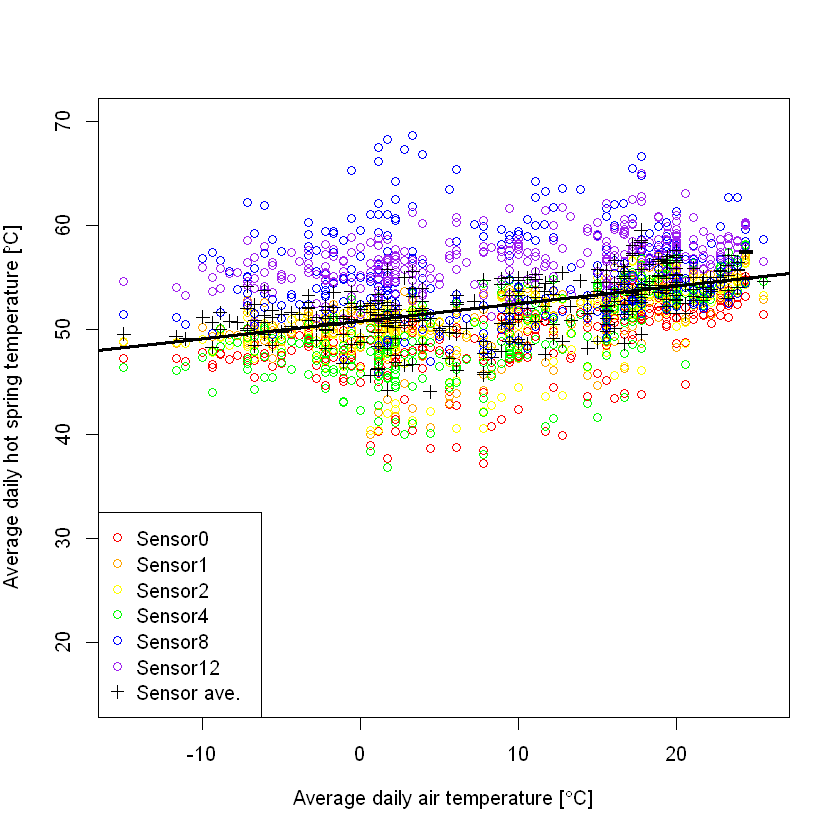

In [10]:
# Plot Bento Sensor0 daily average vs. average air temperature
pcols <- c("red", "orange", "yellow", "green", "blue", "purple")

plot(weather$TemperatureAvgC, bento_daily_trim$Sensor0,
  xlab = expression(paste("Average daily air temperature [",degree,"C]")),
  ylab = expression(paste("Average daily hot spring temperature [",degree,"C]")),
  ylim = c(15, 70), col = pcols[1])
points(weather$TemperatureAvgC, bento_daily_trim$Sensor1, col = pcols[2])
points(weather$TemperatureAvgC, bento_daily_trim$Sensor2, col = pcols[3])
points(weather$TemperatureAvgC, bento_daily_trim$Sensor4, col = pcols[4])
points(weather$TemperatureAvgC, bento_daily_trim$Sensor8, col = pcols[5])
points(weather$TemperatureAvgC, bento_daily_trim$Sensor12, col = pcols[6])
points(weather$TemperatureAvgC, bento_daily_trim$Ave, col = "black", pch = 3)

legend("bottomleft", legend = c(good_sensors, "Sensor ave."),
  col = c(pcols, "black"), pch = c(rep(1, 6), 3))

# Add trendlines
abline(lm(bento_daily_trim$Ave ~ weather$TemperatureAvgC), lwd = 3)

In [11]:
# Summarize relationship between daily average sensor reading and air temperature.
summary(lm(bento_daily_trim$Ave ~ weather$TemperatureAvgC))


Call:
lm(formula = bento_daily_trim$Ave ~ weather$TemperatureAvgC)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5013 -1.1874  0.2734  1.4836  5.7459 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             50.81960    0.17109  297.04   <2e-16 ***
weather$TemperatureAvgC  0.16744    0.01286   13.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.222 on 312 degrees of freedom
Multiple R-squared:  0.3519,	Adjusted R-squared:  0.3498 
F-statistic: 169.4 on 1 and 312 DF,  p-value: < 2.2e-16


There is a positive correlation between average daily air temperature and the daily hot spring temperature averaged across BENTO sensors at Great Boiling Spring, NV, though with an R-squared of about 0.35, this correlation is fairly weak. That said, a small p-value (< 0.001) indicates that the slope of the correlation is unlikely to be zero. If air temperature indeed has an effect on hot spring temperature, it could get convoluted by other factors such as punctuated rainfall, etc. Certain parts of a hot spring might also be more or less influenced by air temperature, such as a shallow area vs. deeper down, so taking an average sensor reading might not be truly representative of the complexity of the whole system.

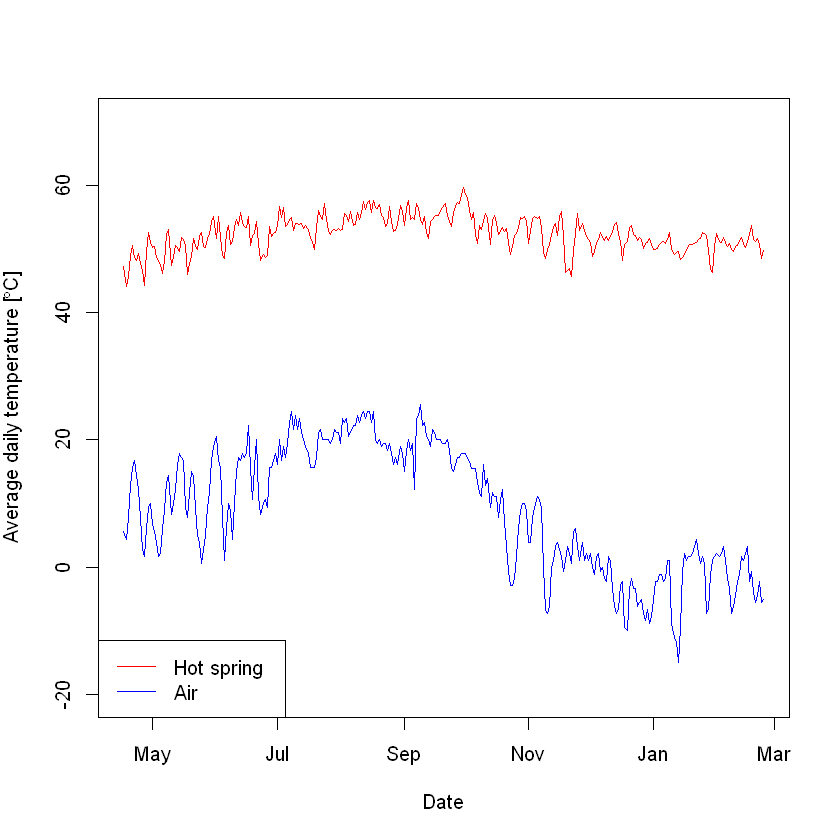

In [12]:
# Plot daily average air temperature and daily average hot spring reading against time
plot(weather$Date, bento_daily_trim$Ave, type = "l",
  xlab = "Date",
  ylab = expression(paste("Average daily temperature [",degree,"C]")),
  ylim = c(-20, 70), col = "red")
lines(weather$Date, weather$TemperatureAvgC, col = "blue")
legend("bottomleft", legend = c("Hot spring", "Air"), col = c("red", "blue"),
  lty = rep(1, 7))

At first glance, it appears as though there could be a correlation; both daily average air and hot spring temperatures look coolest in the winter and hottest in the summer. There is much more variability with air temperature than with hot spring temperature (which has a much more subtle variability), though this is perhaps to be expected given that the heat capacity of water is so much greater than that of air.

 Seasonal fluctuations become more apparent with data plotted on two y-axes:

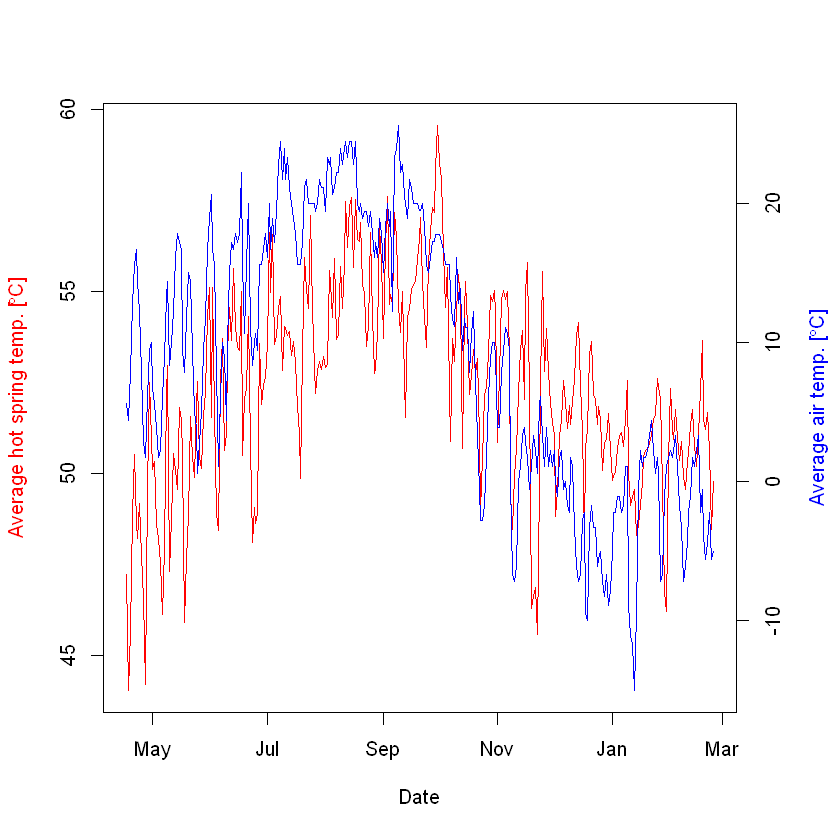

In [13]:
x <- weather$Date
y <- bento_daily_trim$Ave
z <- weather$TemperatureAvgC
par(mar = c(5, 4, 4, 4) + 0.3)  # Leave space for z axis
plot(x, y, type = "l",
  xlab = "Date",
  ylab = "",
  col = "red", lwd = 1)
mtext(expression(paste("Average hot spring temp. [",degree,"C]")), side=2, line=3, col = "red")
par(new = TRUE)
plot(x, z, type = "l", axes = FALSE, bty = "n", xlab = "", ylab = "",
  col = "blue", lwd = 1)
axis(side = 4, at = pretty(range(z)))
mtext(expression(paste("Average air temp. [",degree,"C]")), side=4, line=3, col = "blue")

### Do precipitation events affect hot spring temperature?

*Hypothesis*: if cool meteoric (rain) water is seeping into the hot spring, this could result in a sharp dip in temperature readings from BENTO sensors.

*Strategy*: find local minima in hot spring temperatures and check if a rain event occured sometime prior within 3 days. Additionally, find rain events within a day of local hot spring maxima, as rainfall 

In [14]:
# function for finding local max/minima (taken from StackExchange)
# m is the minimum number of points on either side that must be lower/higher
# for a point to be reported as a local max/minima.
# For minima, use -x when using this function.
find_peaks <- function (x, m = 3){
    shape <- diff(sign(diff(x, na.pad = FALSE)))
    pks <- sapply(which(shape < 0), FUN = function(i){
       z <- i - m + 1
       z <- ifelse(z > 0, z, 1)
       w <- i + m + 1
       w <- ifelse(w < length(x), w, length(x))
       if(all(x[c(z : i, (i + 2) : w)] <= x[i + 1])) return(i + 1) else return(numeric(0))
    })
     pks <- unlist(pks)
     pks
}

In [15]:
# find dates of local minima for hot spring temperatures
minima_date_index <- find_peaks(-bento_daily_trim$Ave, m = 5) # minus for minima.
hot_minima_dates <- bento_daily_trim[minima_date_index, 1] # dates of hot spring temperature local minima
"Local minima in BENTO average daily temperatures:"
hot_minima_dates

[1] "Local minima in BENTO average daily temperatures:"

[1] "2012-04-18" "2012-04-27" "2012-05-06" "2012-05-18" "2012-06-05"
 [6] "2012-06-23" "2012-07-09" "2012-07-19" "2012-07-27" "2012-08-27"
[11] "2012-09-13" "2012-09-24" "2012-10-07" "2012-10-13" "2012-10-23"
[16] "2012-11-01" "2012-11-09" "2012-11-22" "2012-12-02" "2012-12-17"
[21] "2013-01-01" "2013-01-14" "2013-01-30" "2013-02-09" "2013-02-15"
[26] "2013-02-23"

In [16]:
# find dates of local maxima for hot spring temperatures
maxima_date_index <- find_peaks(bento_daily_trim$Ave, m = 5)
hot_maxima_dates <- bento_daily_trim[maxima_date_index, 1] # dates of hot spring temperature local maxima
"Local maxima in BENTO average daily temperatures:"
hot_maxima_dates

[1] "Local maxima in BENTO average daily temperatures:"

[1] "2012-04-21" "2012-04-29" "2012-05-09" "2012-05-15" "2012-06-02"
 [6] "2012-06-13" "2012-07-02" "2012-07-24" "2012-08-06" "2012-08-15"
[11] "2012-09-03" "2012-09-21" "2012-09-30" "2012-10-11" "2012-11-04"
[16] "2012-11-17" "2012-11-25" "2012-12-06" "2012-12-14" "2012-12-21"
[21] "2013-01-09" "2013-01-25" "2013-02-01" "2013-02-18"

In [17]:
# find dates when it rained
rain_date_index <- which(weather$PrecipitationSumIn > 0)
rain_dates <- bento_daily_trim[rain_date_index, 1]
"Dates when it rained:"
rain_dates

[1] "Dates when it rained:"

[1] "2012-04-19" "2012-04-23" "2012-04-24" "2012-04-25" "2012-04-26"
 [6] "2012-04-27" "2012-05-04" "2012-05-05" "2012-05-15" "2012-05-16"
[11] "2012-05-17" "2012-05-18" "2012-05-25" "2012-05-26" "2012-05-27"
[16] "2012-06-04" "2012-06-05" "2012-06-06" "2012-08-18" "2012-08-19"
[21] "2012-09-06" "2012-09-08" "2012-09-23" "2012-09-28" "2012-10-09"
[26] "2012-10-11" "2012-10-25" "2012-10-26" "2012-11-12" "2012-11-13"
[31] "2012-11-14" "2012-11-17" "2012-11-18" "2012-11-19" "2012-11-20"
[36] "2012-11-29" "2012-11-30" "2012-12-01" "2012-12-02" "2012-12-03"
[41] "2012-12-04" "2012-12-05" "2012-12-06" "2013-01-07" "2013-01-08"
[46] "2013-01-09" "2013-01-24" "2013-01-25" "2013-01-26" "2013-01-29"
[51] "2013-01-30"

In [18]:
# Find potential dates that obey either criteria: 1) dates when
# it rained 0-7 days before a local minimum in BENTO temperature readings,
# and 2) dates when it rained within 1 day of a local maximum.
potential_dates <- c()
for (date in rain_dates){
  # Check if any local minima in hot spring temperatures occur
  # 0-7 days after a rain event.
  for (hot_date in hot_minima_dates){
    result <- findInterval(as.numeric(date),
      c(as.numeric(hot_date)-7, as.numeric(hot_date))) == 1
    if (result){
      potential_dates <- c(potential_dates, date)
    }
  }
  # Check if any local maxima in hot spring temperatures occur
  # within two days of a rain event.
  for (hot_date in hot_maxima_dates){
    result <- findInterval(as.numeric(date),
      c(as.numeric(hot_date)-2, as.numeric(hot_date)+2)) == 1
    if (result){
      potential_dates <- c(potential_dates, date)
    }
  }
}

potential_dates <- unique(potential_dates)
potential_dates <- as.Date(potential_dates, origin = "1970-1-1") # R's date origin
"Dates of rainfall in and around hot spring temperature local minima/maxima:"
potential_dates

[1] "Dates of rainfall in and around hot spring temperature local minima/maxima:"

[1] "2012-04-19" "2012-04-23" "2012-04-24" "2012-04-25" "2012-04-26"
 [6] "2012-04-27" "2012-05-04" "2012-05-05" "2012-05-15" "2012-05-16"
[11] "2012-05-17" "2012-06-04" "2012-09-06" "2012-09-08" "2012-09-23"
[16] "2012-09-28" "2012-10-09" "2012-10-11" "2012-10-25" "2012-10-26"
[21] "2012-11-17" "2012-11-18" "2012-11-19" "2012-11-20" "2012-11-29"
[26] "2012-11-30" "2012-12-01" "2012-12-04" "2012-12-05" "2012-12-06"
[31] "2013-01-07" "2013-01-08" "2013-01-09" "2013-01-24" "2013-01-25"
[36] "2013-01-26" "2013-01-29" "2013-01-30"

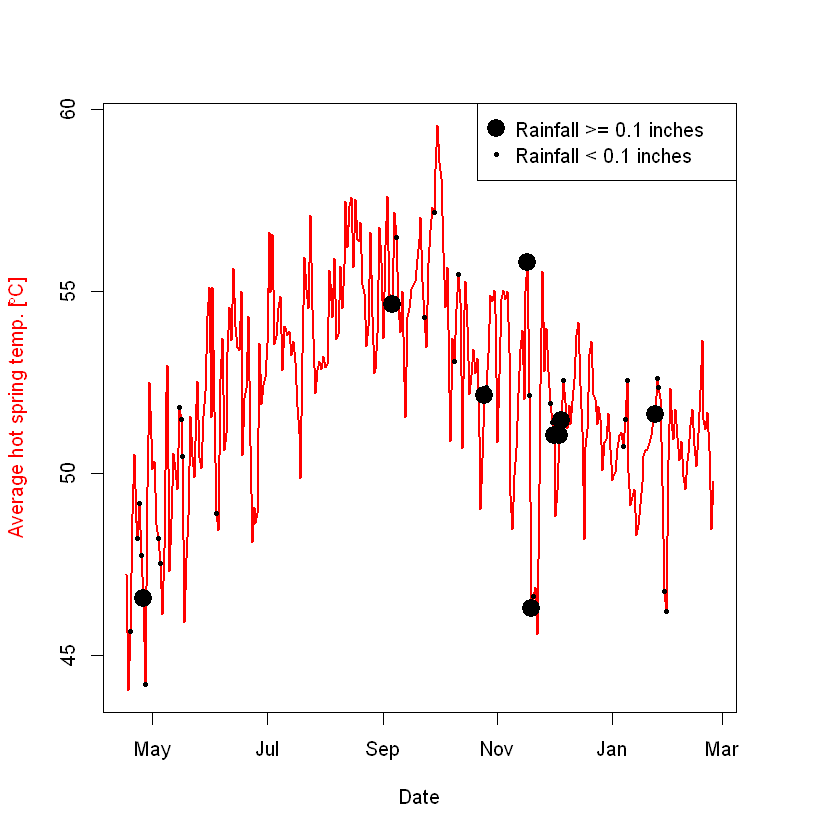

In [19]:
# Plot with rainfall indicated
x <- weather$Date
y <- bento_daily_trim$Ave
z <- weather$TemperatureAvgC
par(mar = c(5, 4, 4, 4) + 0.3)  # Leave space for z axis
plot(x, y, type = "l",
  xlab = "Date",
  ylab = "",
  col = "red", lwd = 2)

# get rain magnitude (inches)
rain_mag <- weather[match(potential_dates, weather[, "Date"]), "PrecipitationSumIn"]

# vary point size by rain magnitude (larger = greater than 0.5 inches of rain)
cex.val <- 1 + (rain_mag >= 0.1) - (rain_mag < 0.1)*0.5

# add points on plot to show rain events
points(potential_dates, bento_daily_trim[match(potential_dates, bento_daily_trim[, 1]), "Ave"],
  pch = 19, col = "black", cex = cex.val)

# create the rest of the plot
mtext(expression(paste("Average hot spring temp. [",degree,"C]")), side=2, line=3, col = "red")
par(new = TRUE)
# plot(x, z, type = "l", axes = FALSE, bty = "n", xlab = "", ylab = "",
#   col = "blue", lwd = 2)
# axis(side = 4, at = pretty(range(z)))
# mtext(expression(paste("Average air temp. [",degree,"C]")), side=4, line=3, col = "blue")

legend("topright", legend=c("Rainfall >= 0.1 inches", "Rainfall < 0.1 inches"), pch = c(19, 19), pt.cex = c(2, 0.5) )


From these results, it is clear that precipitation is not responsible for all local minima in average daily hot spring temperature as there are many temperature dips, especially during the summer months, without concurrent rainfall. That said, larger rainfall events may cause major temperature dips, such as the one observed at the end of November and early December that occur around the same time as a ~10 $^{\circ}$C temperature decrease.

Comparison of climate and hot spring data warrant further study.